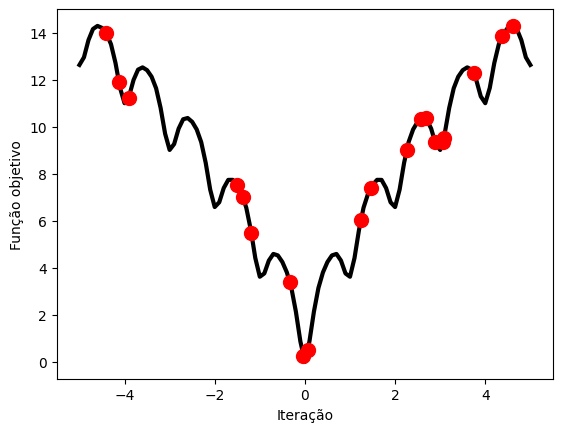

Melhores posições e aptidões finais:
[[ 1.20276987  5.65477311]
 [ 0.42774804  3.95103618]
 [ 1.13627204  4.85820893]
 [ 0.12841791  1.22818656]
 [ 2.88868024  9.34550751]
 [-3.71786225 12.39175797]
 [-0.04337971  0.27128634]
 [-1.35694207  6.93527529]
 [-0.28977902  3.06357732]
 [-2.46966397 10.13924334]
 [ 1.20292416  5.65649992]
 [-3.75865964 12.23140946]
 [ 0.03765824  0.22476027]
 [ 0.19317637  2.05789797]
 [ 2.87519765  9.43473373]
 [-0.35240035  3.53049973]
 [ 1.70784678  7.73551083]
 [-2.83138199  9.73433185]
 [-0.41796277  3.90323995]
 [ 0.06946828  0.51922338]]
Melhor posição global: 0.03765823824655834
Melhor aptidão global: 0.22476027498724038


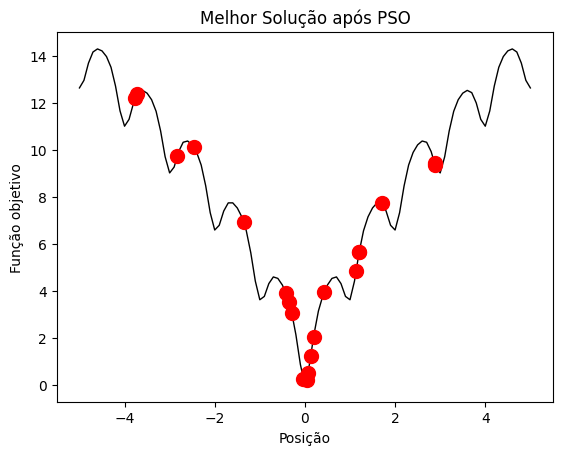

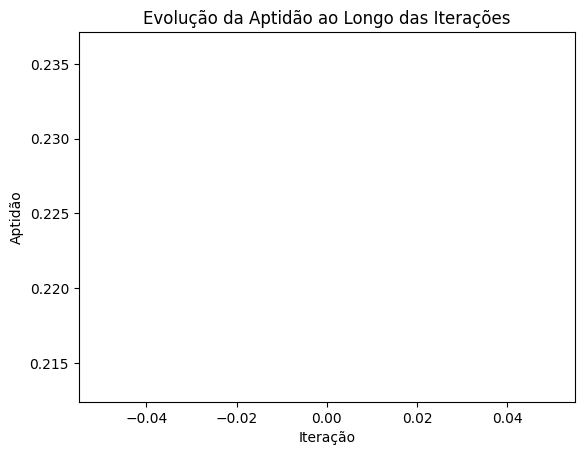

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função de Ackley 1D
def ackley1D(x):
    return -20 * np.exp(-0.2 * np.abs(x)) - np.exp(np.cos(2 * np.pi * x)) + 20 + np.exp(1)

# Parâmetros do PSO
Ng = 1       # Número de iterações
Np = 20       # Número de partículas
c1 = 2.05     # Constante de aceleração 1
c2 = c1       # Constante de aceleração 2
w = 0.6       # Constante de inércia

limites = [-5, 5]  # Limites do intervalo de busca para função de Ackley
x_ackley = np.arange(limites[0], limites[1] + 0.1, 0.1)  # Domínio de x discretizado em incrementos de 0.1
f_ackley = ackley1D(x_ackley)

# Velocidades iniciais das partículas
v = np.zeros(Np)
x = np.random.uniform(limites[0], limites[1], Np)  # Posições iniciais das partículas
Fcand = ackley1D(x)  # Avalia soluções iniciais

x_best = x  # Faz posições iniciais = melhores posições
Fbest = Fcand  # Faz aptidões iniciais = melhores aptidões

# Encontra a melhor solução no enxame
Fmin = np.min(Fbest)
I = np.argmin(Fbest)
g_best = x_best[I]  # Melhor posição corrente no enxame

# Roda o algoritmo por Ng iterações
aptidao = np.zeros(Ng)
for t in range(Ng):
    iteracao = t
    
    # Plota as melhores soluções até o momento sobre a curva da função de Ackley
    if iteracao % 5 == 0:
        plt.figure()
        plt.plot(x_ackley, f_ackley, 'k-', linewidth=3)
        plt.plot(x_best, Fbest, 'ro', markersize=10, linewidth=2)
        plt.xlabel('Iteração')
        plt.ylabel('Função objetivo')
        plt.show()
    
    # Atualiza velocidades das partículas
    Vcog = np.random.rand(Np) * (x_best - x)
    Vsoc = np.random.rand(Np) * (g_best - x)
    v = w * v + c1 * Vcog + c2 * Vsoc  # Atualiza velocidades
    x = x + v  # Atualiza posições (ou seja, gera novas soluções candidatas)

    # Verifica se existem soluções candidatas fora dos limites
    x = np.clip(x, limites[0], limites[1])

    Fcand = ackley1D(x)  # Avalia soluções candidatas
    
    # Avalia soluções candidatas (problema de minimização)
    DF = Fcand - Fbest
    I_better = np.where(DF <= 0)[0]  # Partículas que melhoraram posições
    I_worse = np.where(DF > 0)[0]    # Partículas que pioraram posições

    # Atualiza posições das partículas que melhoraram performance
    x_best[I_better] = x[I_better]
    Fbest[I_better] = Fcand[I_better]

    # Mantém posições das partículas que pioraram performance
    x_best[I_worse] = x_best[I_worse]
    Fbest[I_worse] = Fbest[I_worse]

    # Encontra a melhor solução corrente no enxame
    F_gbest = np.min(Fbest)
    I = np.argmin(Fbest)
    g_best = x_best[I]  # Melhor posição corrente no enxame

    aptidao[t] = F_gbest

print("Melhores posições e aptidões finais:")
print(np.column_stack((x_best, Fbest)))
print("Melhor posição global:", g_best)
print("Melhor aptidão global:", F_gbest)

# Plota a melhor solução após Ng iterações sobre a curva da função de Ackley
plt.figure()
plt.plot(x_ackley, f_ackley, 'k-', linewidth=1)
plt.plot(x_best, Fbest, 'ro', linewidth=3, markersize=10)
plt.xlabel('Posição')
plt.ylabel('Função objetivo')
plt.title('Melhor Solução após PSO')
plt.show()

# Plota a evolução da aptidão ao longo das iterações
plt.figure()
plt.plot(aptidao, linewidth=3)
plt.xlabel('Iteração')
plt.ylabel('Aptidão')
plt.title('Evolução da Aptidão ao Longo das Iterações')
plt.show()
